In [1]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


# PCA

## Install package and dataset 

In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_csv("data.csv")

## Drop the target variable and ReasonsForLack column

In [5]:
df=df.drop("ReasonsForLack",axis=1)
df=df.drop("y",axis=1)

## Change label variables to quantitative data

In [6]:
le = preprocessing.LabelEncoder()
df['Age'] = le.fit_transform(df['Age'])
df['EducationSector'] = le.fit_transform(df['EducationSector'])
df['IndividualProject'] = le.fit_transform(df['IndividualProject'])
df['Gender'] = le.fit_transform(df['Gender'])
df['City'] = le.fit_transform(df['City'])
df['Influenced'] = le.fit_transform(df['Influenced'])
df['MentalDisorder'] = le.fit_transform(df['MentalDisorder'])
df['KeyTraits'] = le.fit_transform(df['KeyTraits'])

In [15]:
df1 = pd.read_csv("data.csv")

def label(X):
    df[X] = le.fit_transform(df[X])
    value = df[X].unique()
    index = df1[X].unique()
    v_df  = pd.DataFrame(value, index)
    v_df.columns = ['value']
    result = v_df.sort_values('value')
    result_to_dict = result.to_dict()
    show = print(result_to_dict)
    return result, show

## Show the value of represented labels

In [16]:
label('Age')

{'value': {17: 0, 18: 1, 19: 2, 20: 3, 21: 4, 22: 5, 23: 6, 24: 7, 25: 8, 26: 9}}


(    value
 17      0
 18      1
 19      2
 20      3
 21      4
 22      5
 23      6
 24      7
 25      8
 26      9,
 None)

In [17]:
label('EducationSector')

{'value': {'Art, Music or Design': 0, 'Economic Sciences, Business Studies, Commerce and Law': 1, 'Engineering Sciences': 2, 'Humanities and Social Sciences': 3, 'Language and Cultural Studies': 4, 'Mathematics or Natural Sciences': 5, 'Medicine, Health Sciences': 6, 'Others': 7, 'Teaching Degree (e.g., B.Ed)': 8}}


(                                                    value
 Art, Music or Design                                    0
 Economic Sciences, Business Studies, Commerce a...      1
 Engineering Sciences                                    2
 Humanities and Social Sciences                          3
 Language and Cultural Studies                           4
 Mathematics or Natural Sciences                         5
 Medicine, Health Sciences                               6
 Others                                                  7
 Teaching Degree (e.g., B.Ed)                            8,
 None)

In [19]:
label('IndividualProject')

{'value': {'No': 0, 'Yes': 1}}


(     value
 No       0
 Yes      1,
 None)

In [20]:
label('Gender')

{'value': {'Female': 0, 'Male': 1}}


(        value
 Female      0
 Male        1,
 None)

In [21]:
label('City')

{'value': {'No': 0, 'Yes': 1}}


(     value
 No       0
 Yes      1,
 None)

In [22]:
label('Influenced')

{'value': {'No': 0, 'Yes': 1}}


(     value
 No       0
 Yes      1,
 None)

In [23]:
label('MentalDisorder')

{'value': {'No': 0, 'Yes': 1}}


(     value
 No       0
 Yes      1,
 None)

In [24]:
label('KeyTraits')

{'value': {'Passion': 0, 'Positivity': 1, 'Resilience': 2, 'Vision': 3, 'Work Ethic': 4}}


(            value
 Passion         0
 Positivity      1
 Resilience      2
 Vision          3
 Work Ethic      4,
 None)

## Process PCA
### fit PCA with 15 components

In [7]:
pca = PCA(n_components = 15)
df_pca = pca.fit_transform(df)  
df_pca.shape

(219, 15)

### PCA components result 

In [8]:
pca.components_

array([[ 0.24347802, -0.01455901, -0.00418867, -0.00608204, -0.00576567,
        -0.01631385, -0.33165243, -0.40225761, -0.38857392, -0.36634369,
        -0.35307504, -0.38483719, -0.33185491, -0.0105168 ,  0.01227721],
       [ 0.96017234,  0.00452829, -0.05735099, -0.01797582,  0.01437819,
         0.00503556,  0.12754329,  0.09683886,  0.11963777,  0.08482992,
         0.02862024,  0.08764496,  0.09787772, -0.00720669,  0.09443045],
       [-0.1023442 ,  0.03090733, -0.17241192,  0.04019856,  0.04673624,
         0.01306791,  0.02653169, -0.00780912,  0.02712937, -0.04490497,
         0.01225013,  0.01364886, -0.06995187,  0.0422266 ,  0.97177337],
       [ 0.0355361 ,  0.11212446,  0.970312  , -0.02068621, -0.03693299,
         0.00102091,  0.00203376, -0.06113933,  0.07318683,  0.03635576,
        -0.0372106 ,  0.00370373, -0.00329377,  0.03478978,  0.17270548],
       [ 0.0096457 , -0.09008461,  0.01112979,  0.14863574, -0.05330504,
         0.01550076, -0.25981028, -0.34841203, 

### Obtain the eigenvalues of the covariance matrix 

In [9]:
pca.explained_variance_

array([5.54483619, 3.99413674, 2.23281652, 1.67466683, 0.73124577,
       0.54967364, 0.48069664, 0.37129859, 0.33210124, 0.28155635,
       0.21426642, 0.20693067, 0.18011149, 0.14958366, 0.12239405])

### Obtain the percentage of variance and the graph 

In [10]:
pca.explained_variance_ratio_

array([0.32489944, 0.23403628, 0.13083179, 0.09812703, 0.04284732,
       0.0322081 , 0.0281664 , 0.02175623, 0.01945946, 0.01649778,
       0.01255493, 0.01212509, 0.01055362, 0.00876485, 0.00717167])

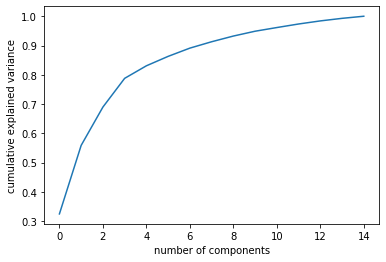

In [11]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Choose the K value with 99% of variance

In [12]:
K_num = []
i = range(1,16)
for x in i: 
    K_num.append(x)

Var = []
a  = pca.explained_variance_ratio_
for x in a: 
    Var.append(x)

Selete_K_Value = pd.DataFrame([K_num,Var])     
Table = Selete_K_Value.T

Table.columns=['K', 'Explained_variance_ratio']
Table['K'] = Table['K'].apply(np.int64)
Table.loc[Table['Explained_variance_ratio'] < 0.01, 'Select the K'] = 'Yes' 
Table.loc[Table['Explained_variance_ratio'] > 0.01, 'Select the K'] = 'No' 
print(Table) 

     K  Explained_variance_ratio Select the K
0    1                  0.324899           No
1    2                  0.234036           No
2    3                  0.130832           No
3    4                  0.098127           No
4    5                  0.042847           No
5    6                  0.032208           No
6    7                  0.028166           No
7    8                  0.021756           No
8    9                  0.019459           No
9   10                  0.016498           No
10  11                  0.012555           No
11  12                  0.012125           No
12  13                  0.010554           No
13  14                  0.008765          Yes
14  15                  0.007172          Yes


We select K = 14

## The data fit to model 

In [13]:
fs_df = pca.fit_transform(df)

In [14]:
fs_df

array([[ 2.93888851e+00, -1.28333848e+00, -1.38405399e+00, ...,
         7.57921844e-01, -5.01608038e-01, -3.08177275e-01],
       [ 4.14951018e-01, -6.24939217e-01,  9.53284224e-01, ...,
         3.01462950e-01, -1.35726822e-01,  7.09162717e-01],
       [ 3.62822006e-01, -5.95771907e-01, -1.27335925e+00, ...,
         1.17302703e-03, -5.21265659e-01, -1.86910596e-01],
       ...,
       [-5.16859196e-02, -4.63964562e-01,  1.06542124e+00, ...,
        -3.34588512e-01,  6.59216846e-01, -4.67081868e-02],
       [ 3.64841154e+00, -1.59257033e+00, -1.39773966e+00, ...,
        -2.13867393e-01, -4.84419740e-01, -4.13697981e-01],
       [-1.22450762e+00, -3.84957544e-01, -1.19568644e+00, ...,
        -3.47143735e-01, -5.80650890e-01,  7.91815476e-01]])

## Print all data that fit to modeling 

In [15]:
np.set_printoptions(threshold=np.inf)

In [16]:
fs_df

array([[ 2.93888851e+00, -1.28333848e+00, -1.38405399e+00,
        -9.83935732e-01,  9.41042844e-02, -2.68635528e-01,
        -1.10417563e+00, -5.70688330e-01, -7.41825830e-01,
        -6.75999516e-02,  8.96026527e-02,  5.68377849e-01,
         7.57921844e-01, -5.01608038e-01, -3.08177275e-01],
       [ 4.14951018e-01, -6.24939217e-01,  9.53284224e-01,
         2.49843401e+00,  7.60104957e-01,  5.86324739e-01,
        -4.00164458e-01,  6.29496905e-01, -2.70179107e-01,
        -1.62344960e-01, -4.99784592e-01, -1.66197982e-01,
         3.01462950e-01, -1.35726822e-01,  7.09162717e-01],
       [ 3.62822006e-01, -5.95771907e-01, -1.27335925e+00,
        -2.14237931e+00,  5.74223915e-01, -1.09687361e+00,
         2.48989294e-01, -2.98877578e-01,  4.19327456e-02,
        -5.70397695e-01,  4.51300223e-01,  2.08113896e-01,
         1.17302703e-03, -5.21265659e-01, -1.86910596e-01],
       [ 1.11400089e+00, -7.65790440e-01,  4.45701159e-01,
         2.80319775e-01, -1.50684628e-03,  1.88348538